In [1]:
# import pandas as pd #data manpulation
# import numpy as np
# import matplotlib.pyplot as plt #data visualization
# import seaborn as sns
# import scipy

# # 1) Cleaning + EDA + Standarization + Encoding 
# import chardet #to detetmine dataset encoding

# #preprocessing: replace numeric and categorical
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import LabelEncoder # label (ordinal or nominal)
# from sklearn.preprocessing import OrdinalEncoder # object (no order)
# from sklearn.preprocessing import OneHotEncoder # categorical 

# # data imbalanced
# from imblearn.datasets import make_imbalance # undersampling
# from sklearn.utils import resample # oversampling
# from imblearn.over_sampling import SMOTE # SMOTE all are numeric
# from imblearn.over_sampling import SMOTENC # smote categorical features

# # 2) Standarize nad change dist of features
# from sklearn.preprocessing import StandardScaler # scaling data so mean = 0 and std =  1 by ((x- u) / std)
# from scipy import stats # for Box-Cox Transformation stats.boxcox(original_data)[0]
# from mlxtend.preprocessing import minmax_scaling # for min_max scaling dont use it
# #or
# from sklearn.preprocessing import MinMaxScaler,normalize  #Tune input range to be 0 -> 1 by MinMaxScaler, same as above


# # 3) feature enginerring
# from sklearn.feature_selection import mutual_info_regression #mutal importance of feature
# from sklearn.feature_selection import RFE, RFECV 
# # a) numeric feature enginering
# from sklearn.cluster import KMeans # Kmeans model for cluster feature
# from scipy.spatial.distance import cdist # for elpow method
# from sklearn.decomposition import PCA # for loadings and adding new feature
# # b) categorical feature enginering
# from category_encoders import MEstimateEncoder # have m estimator


# # 4) Data Modeling = train test split then model then get error
# from sklearn.model_selection import train_test_split, GridSearchCV, KFold, ShuffleSplit #also has cross_val_score (cv)
# from sklearn.model_selection import RepeatedKFold # k fold cross validation it specify cv in corss_val_score dw
# from sklearn.model_selection import cross_val_score # cv to get mean and see how much this feature affect the MAE error
# # ML algorithms
# from sklearn.linear_model import LinearRegression, LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC, LinearSVC
# from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from xgboost import XGBRegressor, XGBClassifier
# # Bagging + Boosting
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import AdaBoostClassifier

# # Stacking Regression & CLassification
# from vecstack import stacking # stacking Regression
# from mlxtend.regressor import StackingCVRegressor
# from mlxtend.classifier import StackingCVClassifier # stacking CLassification
# import itertools # to make combo of stacks

# # Evaluation for model
# from sklearn.metrics import *
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# #for accurace of regression use model.score(y_pred, y_test) mean_absolute_error, mean_squared_error

# from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, auc
# from sklearn.metrics import precision_recall_curve
# from sklearn.metrics import plot_precision_recall_curve
# #for accurace of classification use precision, recall, f1, acc, classification_report, confusion_matrix, roc_curve (tpr, fpr) & roc_auc_score (AUC)

# # you can use (cross_val_score == KFold) (like validation_split=0.1 to get validation_acc) for calssification or regression

# #pipeline
# from sklearn.pipeline import Pipeline, make_pipeline
# from sklearn.compose import ColumnTransformer, make_column_transformer

# # 5) Model summary = features importance and effect + sharp values
# import eli5
# from eli5.sklearn import PermutationImportance # feature importance
# # from pdpbox import pdp, get_dataset, info_plots #for pdp plots
# # import shap  # package used to calculate Shap values
# import time

# # 6) DNN & images & audio visualize
# import tensorflow as tf
# import tensorflow_addons as tfa # to make InstanceNormalization=>(normalize feature axis not like Batch Normalization) for image-to-image models 
# from tensorflow_addons.layers import InstanceNormalization as IN
# import cv2
# import IPython

In [2]:
# import tensorflow_datasets as tfds

# dataset, metadata = tfds.load("cycle_gan/vangogh2photo", with_info=True, as_supervised=True)
# train_van_gogh, train_photo = dataset["trainA"], dataset["trainB"]
# test_van_gogh, test_photo = dataset["testA"], dataset["testB"]

In [3]:
# !pip installs

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

### Initializing some important values
BUFFER_SIZE = 1000
BATCH_SIZE = 1
IMG_WIDTH = 256
IMG_HEIGHT = 256

train_van_gogh = tf.keras.utils.image_dataset_from_directory("vangogh2photo/trainA",
                                                             validation_split=None,
                                                             seed=42,
                                                             shuffle=True,
                                                             image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                             batch_size=BATCH_SIZE)

train_photo = tf.keras.utils.image_dataset_from_directory("vangogh2photo/trainB",
                                                             validation_split=None,
                                                             seed=42,
                                                             shuffle=True,
                                                             image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                             batch_size=BATCH_SIZE)

test_van_gogh = tf.keras.utils.image_dataset_from_directory("vangogh2photo/testA",
                                                             validation_split=None,
                                                             seed=42,
                                                             shuffle=True,
                                                             image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                             batch_size=BATCH_SIZE)

test_photo = tf.keras.utils.image_dataset_from_directory("vangogh2photo/testB",
                                                             validation_split=None,
                                                             seed=42,
                                                             shuffle=True,
                                                             image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                             batch_size=BATCH_SIZE)

C:\Users\ahmed\.conda\envs\machine_learning\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


Found 400 files belonging to 1 classes.
Found 6287 files belonging to 1 classes.
Found 400 files belonging to 1 classes.
Found 751 files belonging to 1 classes.


In [5]:
# # a) Let's Visualize some images
# for data in train_van_gogh.take(2):
#     images, labels = data[0], data[1]
    
#     _, ax = plt.subplots(4, 4, figsize=(15, 10))

#     for i in range(16): # half number of batch
#         img = np.array(images[i]).astype('uint8')
#         label = labels[i] # will always be 0
        
#         ax[i // 4, i % 4].imshow(img)
#         ax[i // 4, i % 4].set_title('vangogh paint')
#         ax[i // 4, i % 4].axis("off")

# plt.show()

In [6]:
### Initializing some important values
BUFFER_SIZE = 1000
BATCH_SIZE = 1
IMG_WIDTH = 256
IMG_HEIGHT = 256

### Randomly crop the image
# def random_crop(image):
#     cropped_image = tf.image.random_crop(image, size=[IMG_HEIGHT, IMG_WIDTH, 3])
#     return cropped_image # random crop

def random_crop(image):
    cropped_image = tf.map_fn(lambda img: tf.image.random_crop(img, size=[IMG_HEIGHT, IMG_WIDTH, 3]), image)
    return cropped_image

### Normalize the image
# normalizing the images to [-1, 1]
def normalize(image):
    image = tf.cast(image, tf.float32)
    image = (image / 127.5) - 1 # -1 -> 1
    return image

### Random jitter in the image according to the paper
def random_jitter(image):
    # resizing to 286 x 286 x 3
    image = tf.image.resize(image, [286, 286], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    # randomly cropping to 256 x 256 x 3
    image = random_crop(image)
    # random mirroring
    image = tf.image.random_flip_left_right(image)
    return image

### Preprocessing the image
def preprocess_image_train(image, label):
    image = random_jitter(image)
    image = normalize(image)
    return image

def preprocess_image_test(image, label):
    image = normalize(image)
    return image

In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_van_gogh = train_van_gogh.cache().map(
    preprocess_image_train, num_parallel_calls=AUTOTUNE).shuffle(
    BUFFER_SIZE).batch(BATCH_SIZE)

train_photo = train_photo.cache().map(
    preprocess_image_train, num_parallel_calls=AUTOTUNE).shuffle(
    BUFFER_SIZE).batch(BATCH_SIZE)

test_van_gogh = test_van_gogh.map(
    preprocess_image_test, num_parallel_calls=AUTOTUNE).cache().shuffle(
    BUFFER_SIZE).batch(BATCH_SIZE)

test_photo = test_photo.map(
    preprocess_image_test, num_parallel_calls=AUTOTUNE).cache().shuffle(
    BUFFER_SIZE).batch(BATCH_SIZE)

### Visualizing the data

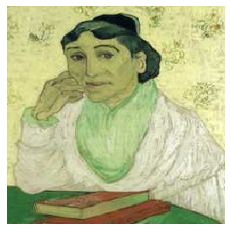

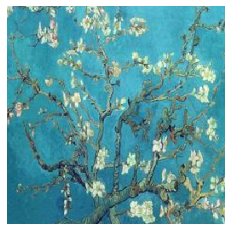

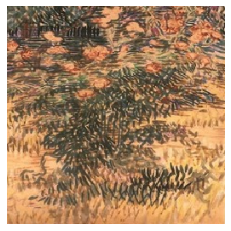

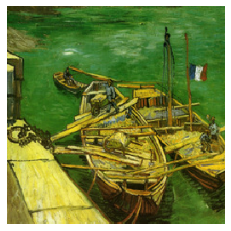

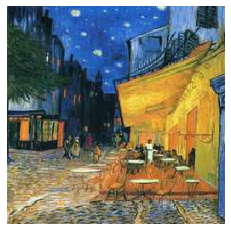

In [8]:
# Vangoh paintings
for batch in train_van_gogh.take(5):
    for image in batch:
        plt.figure()
        plt.imshow(image[0] * 0.5 + 0.5)
        plt.axis(False)
        plt.show()

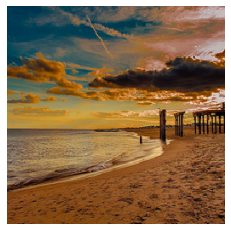

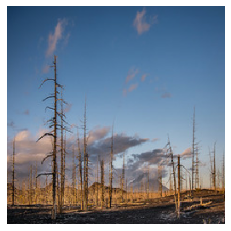

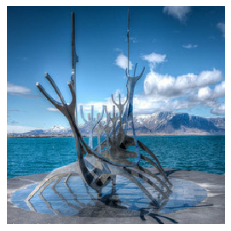

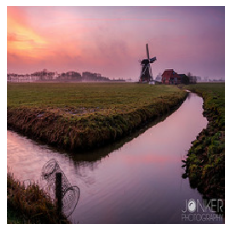

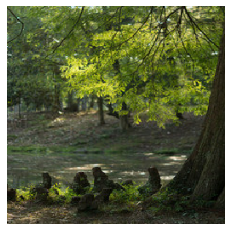

In [9]:
# Normal paintings
for batch in train_photo.take(5):
    for image in batch:
        plt.figure()
        plt.imshow(image[0] * 0.5 + 0.5)
        plt.axis(False)
        plt.show()

## Building the Model: Generator Architecture

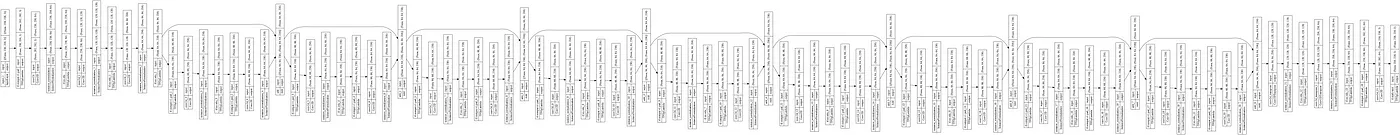

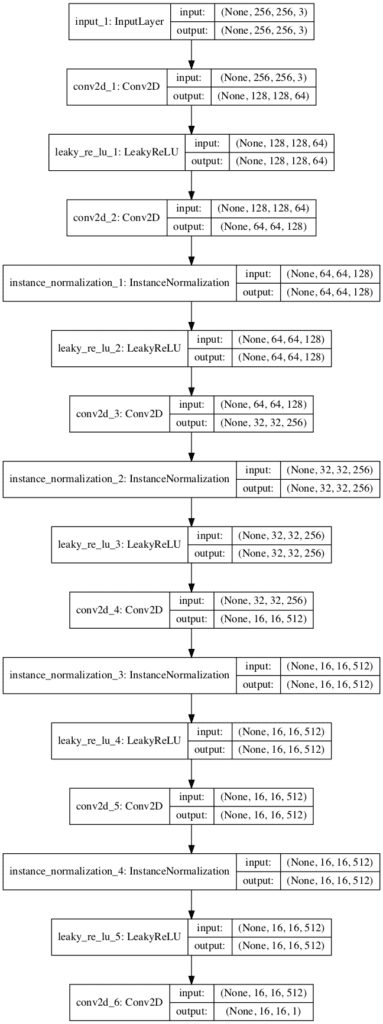

#### 1) Cycle GANs Generator

In [10]:
import tensorflow_addons as tfa

## Making the functions
def _get_norm_layer(norm):
    if norm == "none":
        return lambda: lambda x: x
    elif norm == "batch_norm":
        return tf.keras.layers.BatchNormalization
    elif norm == "instance_norm":
        return tfa.layers.InstanceNormalization
    elif norm == "layer_norm":
        return tf.keras.layers.LayerNormalization

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
from tensorflow_addons.layers import InstanceNormalization as IN

### Making the resnet block
def _residual_block(x, Norm): # same padding
    dim = x.shape[-1]
    h = x
        
    h = tf.pad(h, [[0, 0], [1, 1], [1, 1], [0, 0]], mode='REFLECT')
    h = keras.layers.Conv2D(dim, 3, padding='valid', use_bias=False)(h) # same padding
    h = Norm()(h)
    h = tf.nn.relu(h)
    h = tf.pad(h, [[0, 0], [1, 1], [1, 1], [0, 0]], mode='REFLECT') #  # to add padding on only width and height!!
    h = keras.layers.Conv2D(dim, 3, padding='valid', use_bias=False)(h) # same padding
    h = Norm()(h)
    return keras.layers.add([x, h])

def ResnetGenerator(input_shape=(256, 256, 3),
                    output_channels=3,
                    dim=64,
                    n_downsamplings=2,
                    n_blocks=9,
                    norm='instance_norm'): # batch_norm, instance_norm
    Norm = _get_norm_layer(norm)
# 0
    h = inputs = keras.Input(shape=input_shape)
# 1
    h = tf.pad(h, [[0, 0], [3, 3], [3, 3], [0, 0]], mode='REFLECT')
    h = keras.layers.Conv2D(dim, 7, padding='valid', use_bias=False)(h)
    h = Norm()(h)
    h = tf.nn.relu(h)
# 2
    for _ in range(n_downsamplings): # Conv->instance_norm->Relu 3 times [downsamping]
        dim *= 2 # number of filters *2 each time [64, 128, 256]
        h = keras.layers.Conv2D(dim, 3, strides=2, padding='same', use_bias=False)(h)
        h = Norm()(h)
        h = tf.nn.relu(h)
# 3
    for _ in range(n_blocks): # [residual blocks skip connections]
        h = _residual_block(h, Norm)
# 4
    for _ in range(n_downsamplings): # [upsamping]
        dim //= 2
        h = keras.layers.Conv2DTranspose(dim, 3, strides=2, padding='same', use_bias=False)(h) # to get image back
        h = Norm()(h)
        h = tf.nn.relu(h)
# 5
    h = tf.pad(h, [[0, 0], [3, 3], [3, 3], [0, 0]], mode='REFLECT')
    h = keras.layers.Conv2D(output_channels, 7, padding='valid')(h) # same padding = tf.pad + conv2D
    h = tf.tanh(h) # result is between -1 and 1
    return keras.Model(inputs=inputs, outputs=h)

#### 2) Cycle GANs Discriminator 

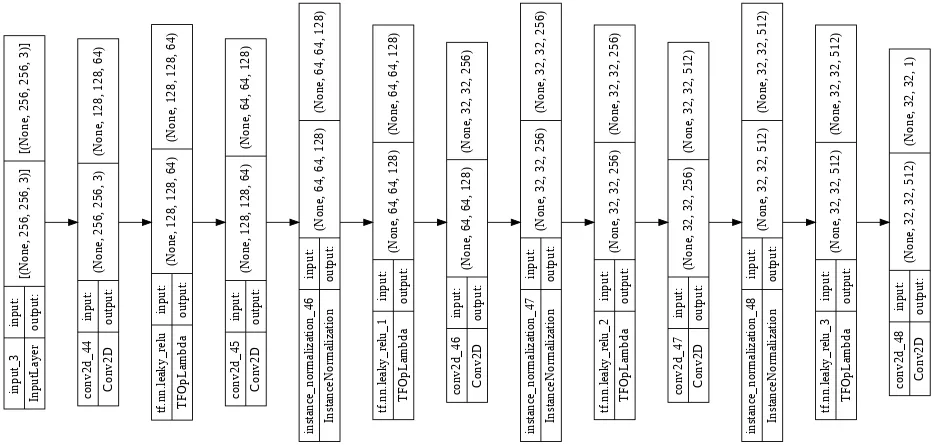

In [12]:
def ConvDiscriminator(input_shape=(256, 256, 3),
                      dim=64,
                      n_downsamplings=3,
                      norm='instance_norm'):
    dim_ = dim
    Norm = _get_norm_layer(norm)
# 0
    h = inputs = keras.Input(shape=input_shape)
# 1
    h = keras.layers.Conv2D(dim, 4, strides=2, padding='same')(h)
    h = tf.nn.leaky_relu(h, alpha=0.2)
    for _ in range(n_downsamplings - 1):
        dim = min(dim * 2, dim_ * 8)
        h = keras.layers.Conv2D(dim, 4, strides=2, padding='same', use_bias=False)(h)
        h = Norm()(h)
        h = tf.nn.leaky_relu(h, alpha=0.2)
# 2
    dim = min(dim * 2, dim_ * 8)
    h = keras.layers.Conv2D(dim, 4, strides=1, padding='same', use_bias=False)(h)
    h = Norm()(h)
    h = tf.nn.leaky_relu(h, alpha=0.2)
# 3
    h = keras.layers.Conv2D(1, 4, strides=1, padding='same')(h)
    return keras.Model(inputs=inputs, outputs=h)

### Initialize the models

In [13]:
## OUTPUT_CHANNELS = 3 ## Hardcoded in the functions
## Building the Resnet Generator as per the cycle gan paper
generator_g = ResnetGenerator()
generator_f = ResnetGenerator()
## Building the Discriminator as per the cucle gan paper
discriminator_x = ConvDiscriminator()
discriminator_y = ConvDiscriminator()

### Trying out the generator and the discriminator for the initial generation

In [14]:
sample_van_gogh = 0
for batch in train_van_gogh.take(1):
    for image in batch[:2]:
        sample_van_gogh = image
        break
    break
    
sample_photo = 0
for batch in train_photo.take(1):
    for image in batch[:2]:
        sample_photo = image
        break
    break
    
sample_van_gogh = sample_van_gogh[0]
sample_photo = sample_photo[0]

sample_van_gogh = np.expand_dims(sample_van_gogh, axis=0)
sample_photo = np.expand_dims(sample_photo, axis=0)

In [15]:
sample_van_gogh.shape, sample_photo.shape

((1, 256, 256, 3), (1, 256, 256, 3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


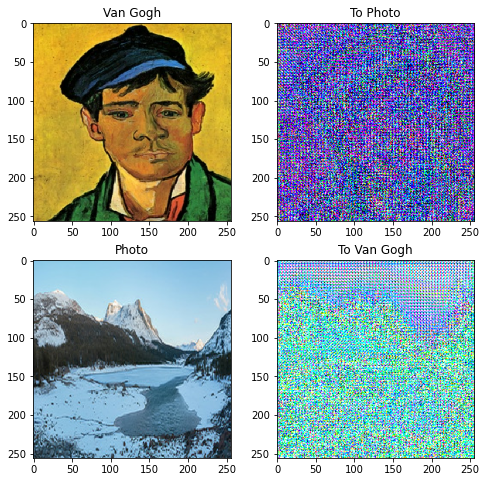

In [16]:
to_photo = generator_g(sample_van_gogh)
to_van_gogh = generator_f(sample_photo)
## Plot the sample 
plt.figure(figsize = (8, 8))
contrast = 8
imgs = [sample_van_gogh, to_photo, sample_photo, to_van_gogh]
title = ["Van Gogh", "To Photo", "Photo", "To Van Gogh"]
for i in range(len(imgs)):
    plt.subplot(2, 2, i+1)
    plt.title(title[i])
    if i % 2 == 0:
        plt.imshow(imgs[i][0] * 0.5 + 0.5)
    else:
        plt.imshow(imgs[i][0] * 0.5 * contrast + 0.5)
plt.show()

In [17]:
LAMBDA = 10
loss_obj = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real, generated):
    real_loss = loss_obj(tf.ones_like(real), real)
    generated_loss = loss_obj(tf.zeros_like(generated), generated)
    total_disc_loss = real_loss + generated_loss
    return total_disc_loss * 0.5

def generator_loss(generated):
    return loss_obj(tf.ones_like(generated), generated)

def calc_cycle_loss(real_image, cycled_image):
    loss1 = tf.reduce_mean(tf.abs(real_image - cycled_image))
    return LAMBDA * loss1

def identity_loss(real_image, same_image):
    loss = tf.reduce_mean(tf.abs(real_image - same_image))
    return LAMBDA * 0.5 * loss

In [18]:
### Initializing the loss functions:
# Initializing the optimizers

generator_g_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
generator_f_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_x_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_y_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

In [19]:
def generate_images(model, test_input):
    prediction = model(test_input)
    plt.figure(figsize=(12, 12))
    display_list = [test_input[0], prediction[0]]
    title = ['Input Image', 'Predicted Image']
    for i in range(2):
        plt.subplot(1, 2, i+1)
        plt.title(title[i])
        # getting the pixel values between [0, 1] to plot it.
        plt.imshow(display_list[i] * 0.5 + 0.5)
        plt.axis('off')
        plt.show()

In [20]:
def train_step(real_x, real_y):
    # persistent is set to True because the tape is used more than once to calculate the gradients.
    with tf.GradientTape(persistent=True) as tape:
        # Generator G translates X -> Y
        # Generator F translates Y -> X.
        fake_y = generator_g(real_x, training=True)
        cycled_x = generator_f(fake_y, training=True)
        
        fake_x = generator_f(real_y, training=True)
        cycled_y = generator_g(fake_x, training=True)
        
        # same_x and same_y are used for identity loss.
        same_x = generator_f(real_x, training=True)
        same_y = generator_g(real_y, training=True)
        
        disc_real_x = discriminator_x(real_x, training=True)
        disc_real_y = discriminator_y(real_y, training=True)
        disc_fake_x = discriminator_x(fake_x, training=True)
        disc_fake_y = discriminator_y(fake_y, training=True)
        
        # calculate the loss
        gen_g_loss = generator_loss(disc_fake_y)
        gen_f_loss = generator_loss(disc_fake_x)
        
        total_cycle_loss = calc_cycle_loss(real_x, cycled_x) + calc_cycle_loss(real_y, cycled_y)
        
        # Total generator loss = adversarial loss + cycle loss
        total_gen_g_loss = gen_g_loss + total_cycle_loss + identity_loss(real_y, same_y)
        total_gen_f_loss = gen_f_loss + total_cycle_loss + identity_loss(real_x, same_x)
        
        disc_x_loss = discriminator_loss(disc_real_x, disc_fake_x)
        disc_y_loss = discriminator_loss(disc_real_y, disc_fake_y)
        
    # Calculate the gradients for generator and discriminator
    generator_g_gradients = tape.gradient(total_gen_g_loss, generator_g.trainable_variables)
    generator_f_gradients = tape.gradient(total_gen_f_loss, generator_f.trainable_variables)
    discriminator_x_gradients = tape.gradient(disc_x_loss, discriminator_x.trainable_variables)
    discriminator_y_gradients = tape.gradient(disc_y_loss, discriminator_y.trainable_variables)
    
    # Apply the gradients to the optimizer
    generator_g_optimizer.apply_gradients(zip(generator_g_gradients, generator_g.trainable_variables))
    generator_f_optimizer.apply_gradients(zip(generator_f_gradients, generator_f.trainable_variables))
    discriminator_x_optimizer.apply_gradients(zip(discriminator_x_gradients, discriminator_x.trainable_variables))
    discriminator_y_optimizer.apply_gradients(zip(discriminator_y_gradients, discriminator_y.trainable_variables))


In [21]:
# EPOCHS = 100
# for epoch in range(EPOCHS):
#     start = time.time()
#     n = 0
#     for image_x, image_y in tf.data.Dataset.zip((train_van_gogh, train_photo)):
#         train_step(image_x, image_y)
#         if n % 10 == 0:
#             print ('.', end='')
#         n += 1
#     clear_output(wait=True)
    
#     # Using a consistent image (sample_horse) so that the progress of the model
#     # is clearly visible.
#     generate_images(generator_g, sample_van_gogh)
    
#     if (epoch + 1) % 5 == 0:
#         ckpt_save_path = ckpt_manager.save()
#         print ('Saving checkpoint for epoch {} at {}'.format(epoch+1, ckpt_save_path))
    
#     print ('Time taken for epoch {} is {} sec\n'.format(epoch + 1, time.time()-start))



In [22]:
# # it's working
# EPOCHS = 100
# for epoch in range(EPOCHS):
#     start = time.time()
#     n = 0
#     for batch_x, batch_y in tf.data.Dataset.zip((train_van_gogh, train_photo)):
#         # Create tf.data.Dataset objects from the tensors
#         dataset_x = tf.data.Dataset.from_tensor_slices(batch_x)
#         dataset_y = tf.data.Dataset.from_tensor_slices(batch_y)
#         # Zip the datasets together to iterate over the individual elements
#         dataset = tf.data.Dataset.zip((dataset_x, dataset_y))
        
#         for image_x, image_y in dataset:
#             train_step(image_x, image_y)
#             if n % 10 == 0:
#                 print ('.', end='')
#             n += 1
#     clear_output(wait=True)
    
#     # Using a consistent image (sample_horse) so that the progress of the model
#     # is clearly visible.
#     generate_images(generator_g, sample_van_gogh)
    
#     if (epoch + 1) % 5 == 0:
#         ckpt_save_path = ckpt_manager.save()
#         print ('Saving checkpoint for epoch {} at {}'.format(epoch+1, ckpt_save_path))
    
#     print ('Time taken for epoch {} is {} sec\n'.format(epoch + 1, time.time()-start))

In [24]:
train_dataset = tf.data.Dataset.zip((train_van_gogh, train_photo)).shuffle(BUFFER_SIZE)
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE).cache()

EPOCHS = 100
for epoch in range(EPOCHS):
    start = time.time()
    n = 0
    for batch_x, batch_y in train_dataset:
        # Create tf.data.Dataset objects from the tensors
        dataset_x = tf.data.Dataset.from_tensor_slices(batch_x)
        dataset_y = tf.data.Dataset.from_tensor_slices(batch_y)
        # Zip the datasets together to iterate over the individual elements
        dataset = tf.data.Dataset.zip((dataset_x, dataset_y))
        
        for image_x, image_y in dataset:
            train_step(image_x, image_y)
            if n % 10 == 0:
                print ('.', end='')
            n += 1
    clear_output(wait=True)
    
    # Using a consistent image (sample_horse) so that the progress of the model
    # is clearly visible.
    generate_images(generator_g, sample_van_gogh)
    
    if (epoch + 1) % 5 == 0:
        ckpt_save_path = ckpt_manager.save()
        print ('Saving checkpoint for epoch {} at {}'.format(epoch+1, ckpt_save_path))
    
    print ('Time taken for epoch {} is {} sec\n'.format(epoch + 1, time.time()-start))

10
.10



KeyboardInterrupt



In [ ]:
for inp in test_photo.take(15):
    generate_images(generator_van_gogh, inp)